<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/Multiple_Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
from sklearn.datasets import fetch_california_housing

In [146]:
data = fetch_california_housing(as_frame=True)

In [147]:
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [148]:
X = data.data.values
y = data.target.values

In [149]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [150]:
y.shape, X.shape

((20640,), (20640, 8))

In [151]:
n,d = X.shape

In [152]:
w = np.zeros(d)
b = 0

In [153]:
epochs = 2000
lr = 0.001
losses = []

for epoch in range(epochs):
  y_hat = np.dot(X, w) + b

  error = y_hat - y

  dw = (1/n) * np.dot(X.T, error)
  db = (1/n) * np.sum(error)

  w = w - lr * dw
  b = b - lr * db

  loss = np.mean(error ** 2)
  losses.append(loss)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} \t loss: {loss}")

Epoch: 0 	 loss: 5.610483198987253
Epoch: 100 	 loss: 4.706446932688324
Epoch: 200 	 loss: 3.967620076083048
Epoch: 300 	 loss: 3.363519365457447
Epoch: 400 	 loss: 2.8693540275418368
Epoch: 500 	 loss: 2.464942727573527
Epoch: 600 	 loss: 2.13384261597781
Epoch: 700 	 loss: 1.8626471323363374
Epoch: 800 	 loss: 1.6404186087359935
Epoch: 900 	 loss: 1.458228918786038
Epoch: 1000 	 loss: 1.3087869888174901
Epoch: 1100 	 loss: 1.186136323182373
Epoch: 1200 	 loss: 1.0854090905651577
Epoch: 1300 	 loss: 1.0026259916678166
Epoch: 1400 	 loss: 0.9345332445248347
Epoch: 1500 	 loss: 0.8784697058931772
Epoch: 1600 	 loss: 0.8322584899017567
Epoch: 1700 	 loss: 0.7941185207093824
Epoch: 1800 	 loss: 0.7625923201231036
Epoch: 1900 	 loss: 0.7364870273613864


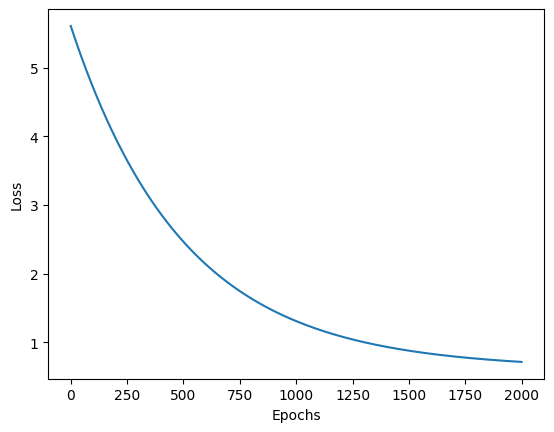

In [154]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [155]:
def predict_one(X):
  return np.dot(X, w) + b

In [156]:
predict_one([8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556,	37.88, -122.23	])

np.float64(23.741206091716446)

In [157]:
def r2_score(y_hat, y):
  return 1 - (np.sum((y_hat - y)**2) / np.sum((y - y.mean())**2))

In [159]:
r2_score(y_hat, y)

np.float64(0.463014222690892)